<a href="https://colab.research.google.com/github/riamary18/Horse-or-Human-Classification/blob/main/Horse_or_Human_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os
import matplotlib.pyplot as plt
%matplotlib inline

Download and extract the necessary datasets

In [2]:
!wget --no-check-certificate \
  https://storage.googleapis.com/learning-datasets/horse-or-human.zip \
  -O /tmp/horse-or-human.zip

zipref=zipfile.ZipFile('/tmp/horse-or-human.zip')
zipref.extractall('/tmp/horse-or-human')
zipref.close()

!wget --no-check-certificate \
  https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip \
  -O /tmp/val-horse-or-human.zip

zipref=zipfile.ZipFile('/tmp/val-horse-or-human.zip')
zipref.extractall('/tmp/val-horse-or-human')
zipref.close()

--2023-12-13 15:51:33--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.183.207, 173.194.193.207, 173.194.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.183.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   184MB/s    in 0.8s    

2023-12-13 15:51:34 (184 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2023-12-13 15:51:35--  https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.183.207, 173.194.193.207, 173.194.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.183.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/z

Create a callback that will stop training your model when the required accuracy is reached

In [30]:
import tensorflow as tf
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if (logs.get('accuracy')>0.98):
      print("We can stop training model now")
      self.model.stop_training=True
callbacks=MyCallback()

In [4]:
os.listdir('/tmp/horse-or-human')

['horses', 'humans']

In [5]:
horse_dir='/tmp/horse-or-human/horses'
human_dir='/tmp/horse-or-human/humans'

In [22]:
val_horse_dir='/tmp/val-horse-or-human/horses'
val_human_dir='/tmp/val-horse-or-human/humans'

In [23]:
train_horse_names = os.listdir(horse_dir)
train_human_names = os.listdir(human_dir)

validation_horse_hames = os.listdir(val_horse_dir)
validation_human_names = os.listdir(val_human_dir)

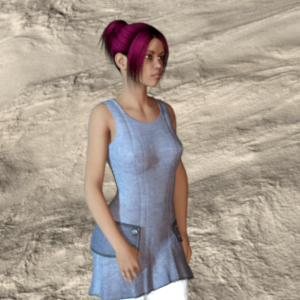

In [7]:
from IPython.display import Image
Image('/tmp/horse-or-human/humans/human07-09.png')
# training_human[1]

Create your model

In [24]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # First convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 64)       

Compile your model

In [26]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

Preprocess your data

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
training_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)

train_generator=training_datagen.flow_from_directory(
    '/tmp/horse-or-human',
    target_size=(150,150),
    batch_size=128,
    class_mode='binary'
)

val_generator=val_datagen.flow_from_directory(
    '/tmp/val-horse-or-human',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


Fit your model

In [28]:
history=model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=val_generator,
    validation_steps=8,
    callbacks=[callbacks]
)

Epoch 1/15
8/8 [==============================] - 10s 1s/step - loss: 11.6752 - accuracy: 0.4883 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 7s 809ms/step - loss: 0.6928 - accuracy: 0.5195 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 8s 985ms/step - loss: 0.6895 - accuracy: 0.5217 - val_loss: 0.6972 - val_accuracy: 0.5000
Epoch 4/15
8/8 [==============================] - 8s 991ms/step - loss: 0.7318 - accuracy: 0.5395 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/15
8/8 [==============================] - 8s 1s/step - loss: 0.6938 - accuracy: 0.5028 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/15
8/8 [==============================] - 6s 790ms/step - loss: 0.6927 - accuracy: 0.4983 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 7/15
8/8 [==============================] - 8s 973ms/step - loss: 0.6949 - accuracy: 0.5072 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 8/15
8/8 [========

Make predictions

Saving GettyImages-909948608-5c69cd9446e0fb0001560d1a.jpg to GettyImages-909948608-5c69cd9446e0fb0001560d1a (1).jpg


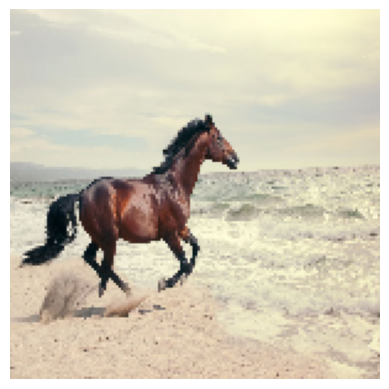

1/1 [==============================] - 0s 210ms/step
[5.508361e-10]
horse


In [31]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()
for x in uploaded.keys():
    path = '/content/' + x
    img = image.load_img(path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0] > 0.5:
        print('human')
    else:
        print('horse')

##Visualising the intermediate representations

1/1 [==============================] - 0s 100ms/step


<ipython-input-40-1d188697bc95>:32: RuntimeWarning: invalid value encountered in divide
  x/=x.std()


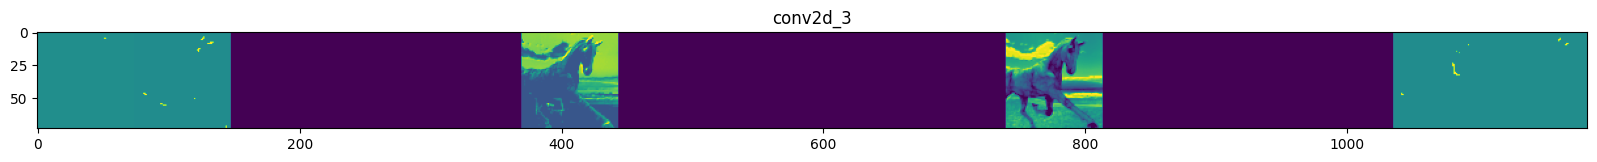

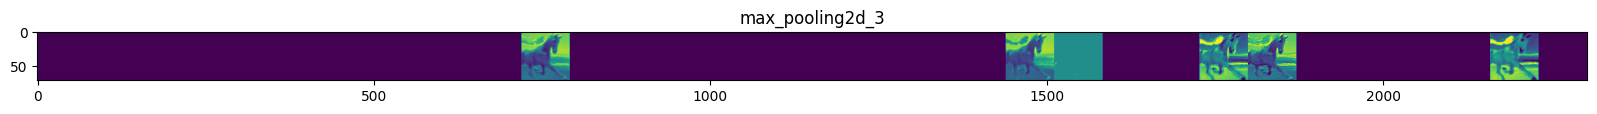

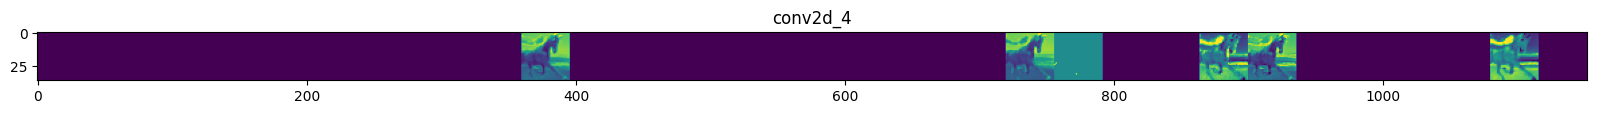

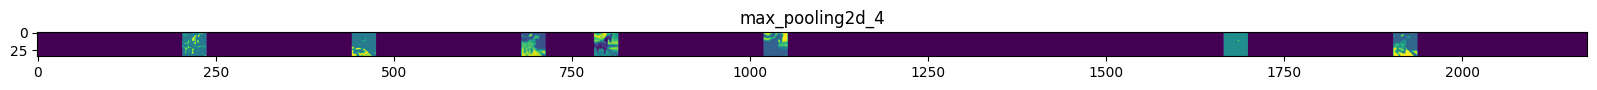

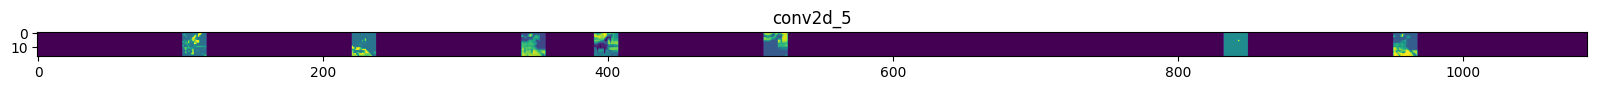

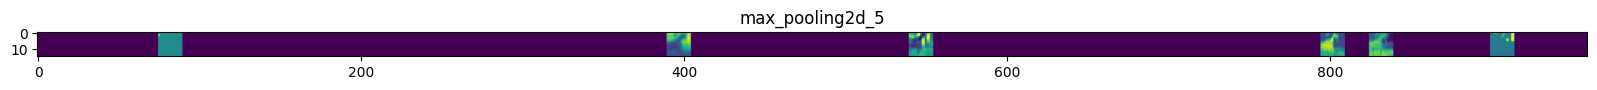

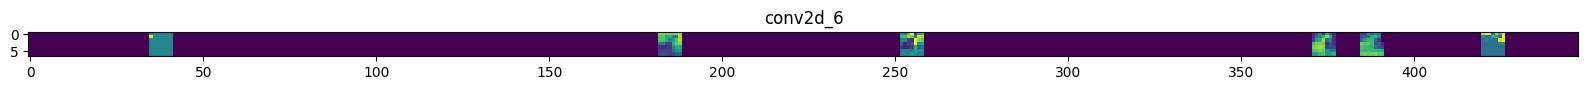

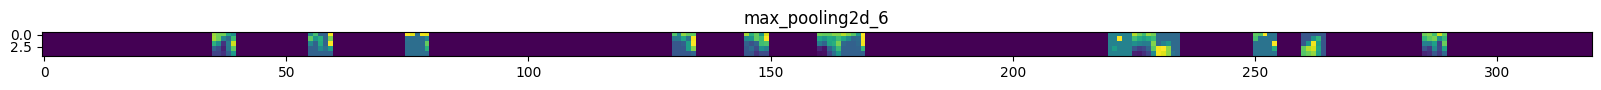

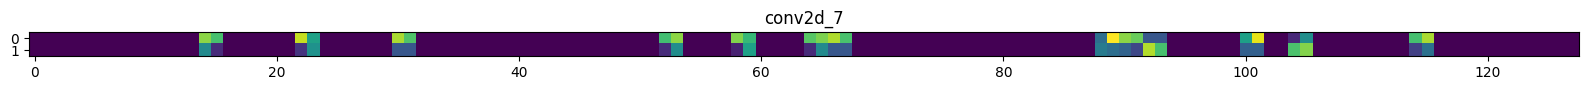

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

#This model will take image as the input and will output the intermediate representations for all layers in the previous model
successive_outputs=[layer.output for layer in model.layers[1:]]
visualization_model=tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Prepare a random input image from the training set
horse_img_files=[os.path.join(horse_dir,f) for f in train_horse_names]
human_img_files=[os.path.join(human_dir,f) for f in train_human_names]
img_path=random.choice(horse_img_files + human_img_files)

img=load_img(img_path,target_size=(150, 150))
x=img_to_array(img)
x=x.reshape((1,)+x.shape)
x/=255

successive_feature_maps=visualization_model.predict(x)

layer_names=[layer.name for layer in model.layers]

#Display the representations
for layer_name,feature_map in zip(layer_names,successive_feature_maps):
  if len(feature_map.shape)==4:
    n_features=feature_map.shape[-1]
    size=feature_map.shape[1]
    display_grid=np.zeros((size,size*n_features))
    for i in range(n_features):
      x=feature_map[0,:,:,i]
      x-=x.mean()
      x/=x.std()
      x*=64
      x+=128
      x=np.clip(x,0,255).astype('uint8')
      display_grid[:,i*size:(i+1)*size]=x
    scale=20./n_features
    plt.figure(figsize=(scale*n_features,scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='viridis')